# Exercise 28 - Plotting Data with Moving Average

Throughout this exercise we will plot, investigate and gain a thorough understanding of the dataset we are to model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('synth_temp.csv')
df.head()

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845


In [3]:
df = df.loc[df.Year > 1901]
df.head()

,AverageTemperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


Construct the yearly averages

In [4]:
df_group_year = df.groupby('Year').agg(np.mean)
df_group_year.head()

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770


Compute the moving average filter

In [5]:
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();
rolling.head(n=20)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
1917    17.475434
1918    17.463959
1919    17.472423
1920    17.474037
1921    17.480317
Name: AverageTemperature, dtype: float64

Plot the raw data and moving average signal

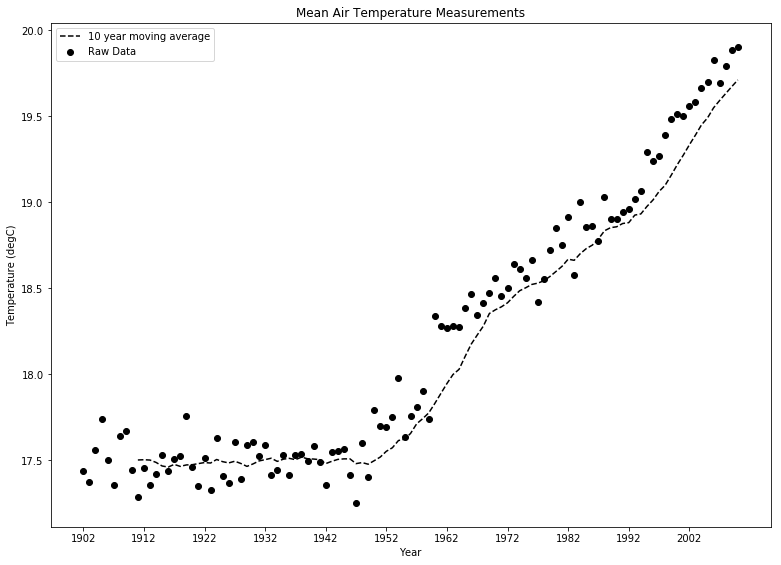

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();